In [13]:
import pandas as pd
import matplotlib.pyplot as plt  
dates = ["30-09-21", "08-12-21", "31-12-21", "31-03-22", "30-06-22"]
file_name_syntax = ["IEX_Public Shareholding_", " - Sheet1.csv"]
# Entities of Interest
#eoi = ["Alternate Investment Funds", "PARAG PARIKH FLEXI CAP FUND", "MIRAE ASSET TAX SAVER FUND", 'Mutual Funds/', "Foreign Portfolio Investors", "LIFE INSURANCE CORPORATION OF INDIA", "SMALLCAP WORLD FUND, INC", "WF ASIAN RECONNAISSANCE FUND LIMITED", "AQUAMARINE MASTER FUND L.P", "ICICI PRUDENTIAL LIFE INSURANCE COMPANY LIMITED"]
eoi = []
eoi_to_exclude = ['Sub-Total (B)(1)', 'Sub-Total (B)(3)', 'other', 'others']

In [14]:
for date in dates:
    file_name = date.join(file_name_syntax)
    df_for_eoi = pd.read_csv(file_name,index_col=0, header=0)
    entities = df_for_eoi.loc[:, "CATEGORY OF SHAREHOLDER"]
    df = pd.read_csv(file_name,index_col=1, header=0)
    for entity in entities:
        try:
            sharholding_percent = float(df.loc[:,'SHAREHOLDING AS A % OF TOTAL NO. OF SHARES (CALCULATED AS PER SCRR, 1957) AS A % OF (A+B+C2)'].get(entity, "NAN"))
        except Exception as e:
            print(f"Failed for entity:{entity} and date:{date}", e, df.loc[:,'SHAREHOLDING AS A % OF TOTAL NO. OF SHARES (CALCULATED AS PER SCRR, 1957) AS A % OF (A+B+C2)'].get(entity, "NAN"))
            continue
        if float(sharholding_percent) > 0 and entity not in eoi and entity not in eoi_to_exclude:
            eoi.append(entity)

            

Failed for entity:(II) and date:30-09-21 could not convert string to float: '(VIII)' (VIII)
Failed for entity:Institutions and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Venture Capital Funds and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Foreign Venture Capital Investors and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Insurance Companies and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Provident Funds/ Pension Funds and date:30-09-21 could not convert string to float: '-' -
Failed for entity:Any Other (specify) and date:30-09-21 cannot convert the series to <class 'float'> CATEGORY OF SHAREHOLDER
Any Other (specify)     5.92
Any Other (specify)    19.42
Name: SHAREHOLDING AS A % OF TOTAL NO. OF SHARES (CALCULATED AS PER SCRR, 1957) AS A % OF (A+B+C2), dtype: object
Failed for entity:Other and date:30-09-21 cannot convert the series to <class 'float'> CATEGORY OF SHAREHO

['Mutual Funds/', 'NIPPON LIFE INDIA TRUSTEE LTD-A/C NIPPON INDIA SMALL CAP FUND', 'UTI-MASTERSHARE UNIT SCHEME', 'MIRAE ASSET TAX SAVER FUND', 'PPFAS MUTUAL FUND - PARAG PARIKH FLEXI CAP FUND', 'Alternate Investment Funds', 'Foreign Portfolio Investors', 'FIDELITY INVESTMENT TRUST FIDELITY SERIES INTERNAT', 'INDUS INDIA FUND (MAURITIUS) LIMITED', 'SMALLCAP WORLD FUND, INC', 'WF ASIAN RECONNAISSANCE FUND LIMITED', 'MASSACHUSETTS INSTITUTE OF TECHNOLOGY', 'BAILLIE GIFFORD PACIFIC FUND A SUB FUND OF BAILLIE', 'BNP PARIBAS ARBITRAGE - ODI', 'AQUAMARINE MASTER FUND L.P', 'Financial Institutions/ Banks', 'ICICI PRUDENTIAL LIFE INSURANCE COMPANY LIMITED', 'LIFE INSURANCE CORPORATION OF INDIA', 'Overseas Corporate Bodies', 'RIMCO (MAURITIUS) LIMITED', 'Individuals -', 'Individual shareholders holding nominal share capital up to Rs. 2 lakhs.', 'Individual shareholders holding nominal share capital in excess of Rs. 2 lakhs.', 'NBFCs registered with RBI', 'Bodies Corporate', 'DALMIA CEMENT (BHAR

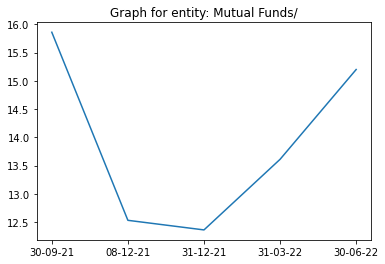

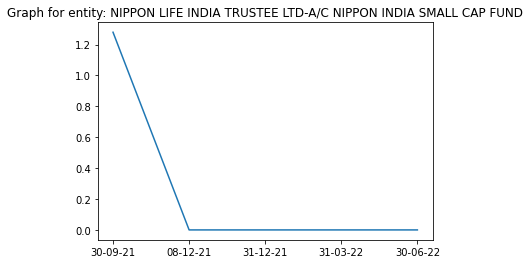

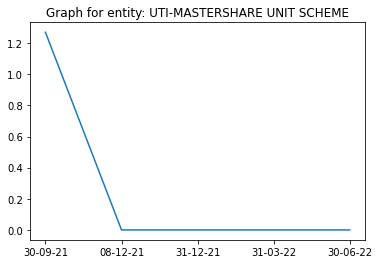

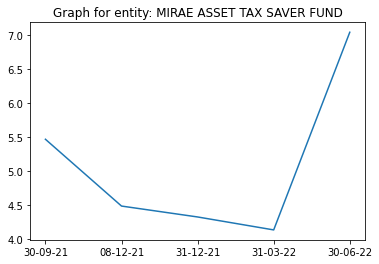

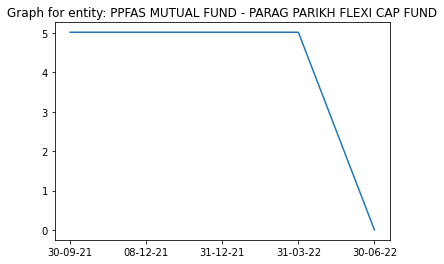

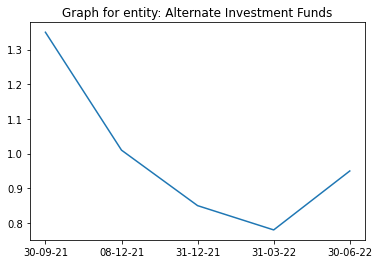

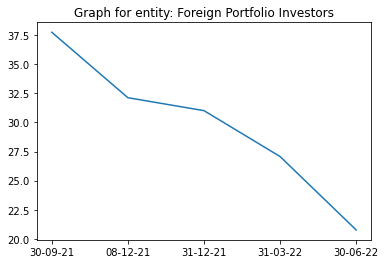

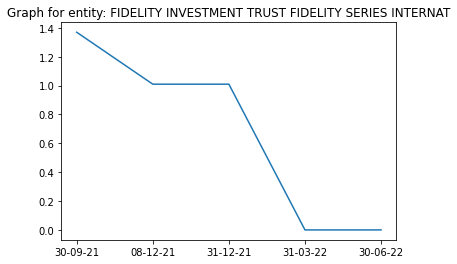

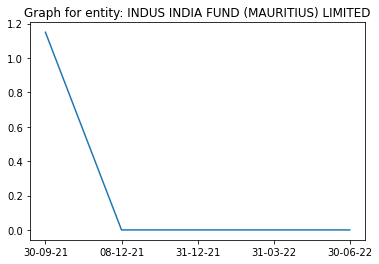

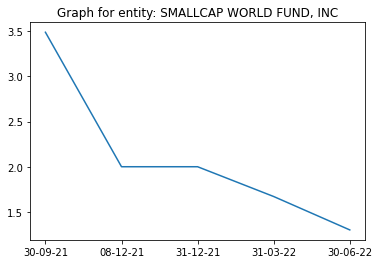

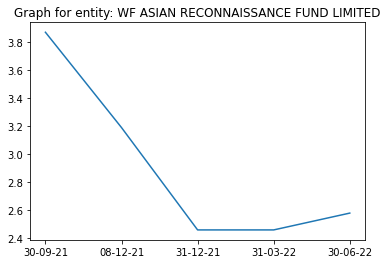

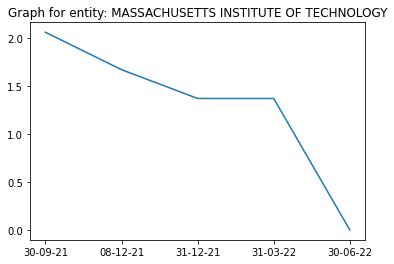

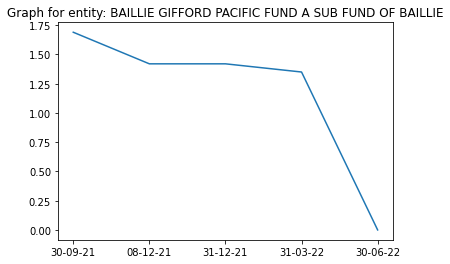

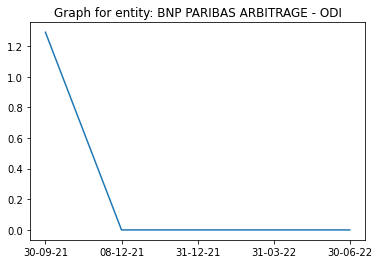

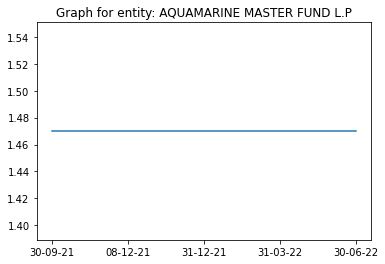

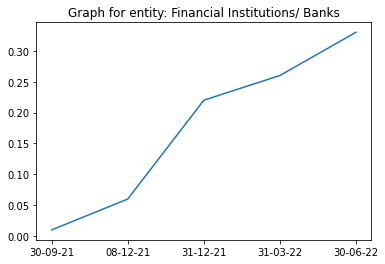

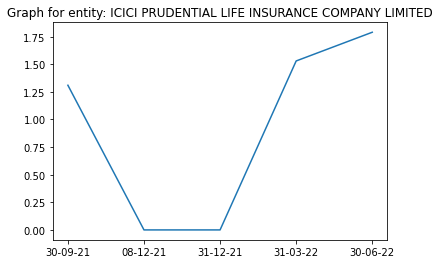

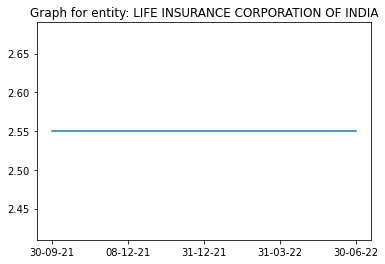

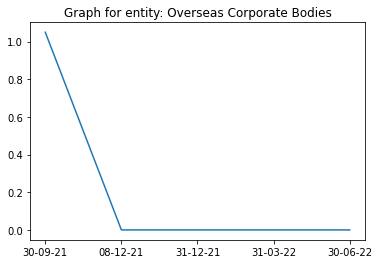

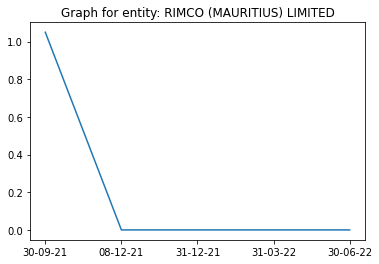

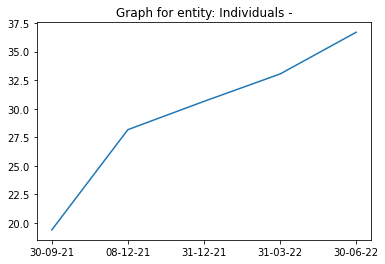

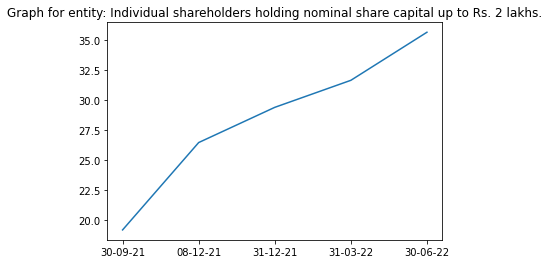

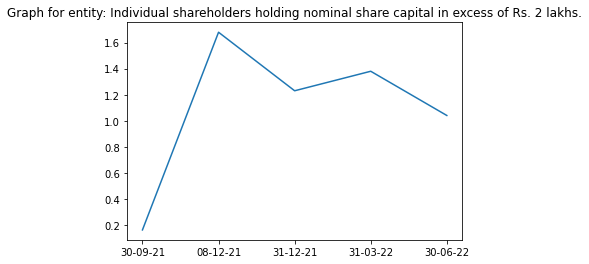

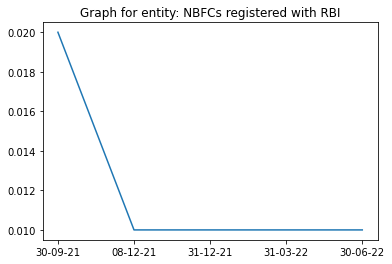

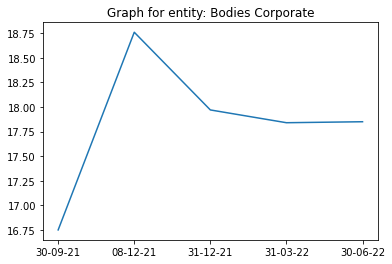

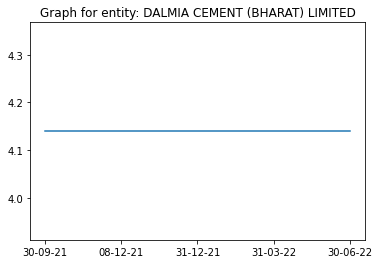

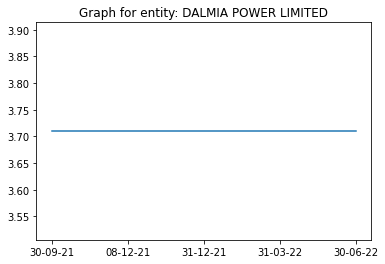

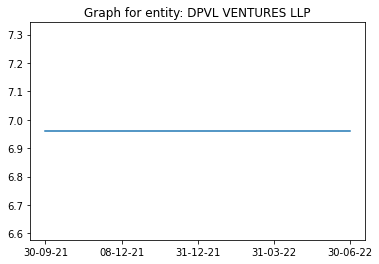

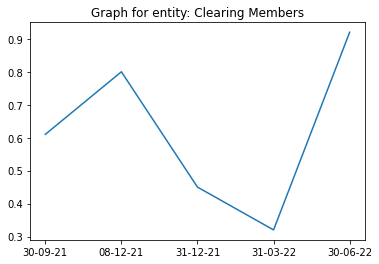

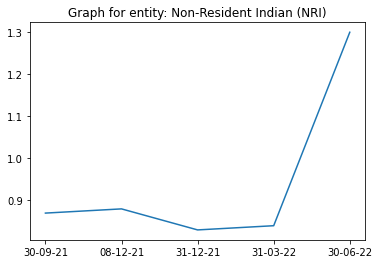

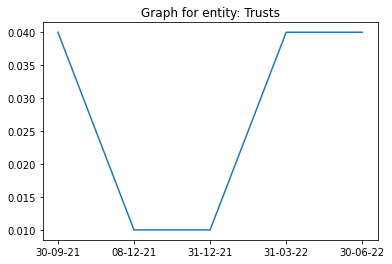

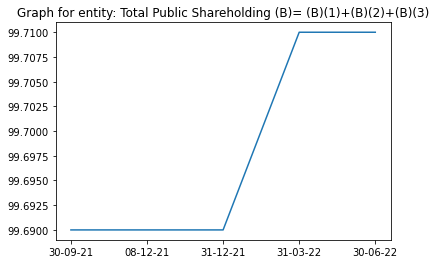

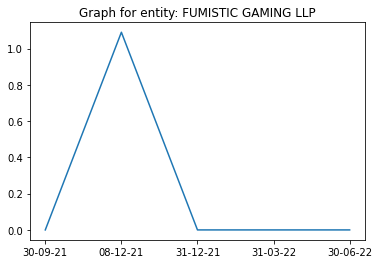

TypeError: cannot convert the series to <class 'float'>

In [15]:
print(eoi)
from collections import OrderedDict
for entity in eoi:
    #print(entity)
    date_sharholding_per_map = OrderedDict()
    for date in dates:
        file_name = date.join(file_name_syntax)
        df = pd.read_csv(file_name,index_col=1, header=0)
        date_sharholding_per_map[date] = float(df.loc[:,'SHAREHOLDING AS A % OF TOTAL NO. OF SHARES (CALCULATED AS PER SCRR, 1957) AS A % OF (A+B+C2)'].get(entity, "0"))
    #print(date_sharholding_per_map)
    plt.title(f"Graph for entity: {entity}")
    plt.plot(dates, date_sharholding_per_map.values()) 
    plt.show()